##  Importar paquetes

In [211]:
import pandas as pd                    # Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm           # Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() #visualización usando seaborn

##  Leer base de datos

In [212]:
df = pd.read_csv('C:\\Users\\USUARIO\\Downloads\\daespuga_Costo de casa.csv',sep=",",index_col=0)
del(df['No'])
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


##  Estructura y primeras observaciones de la base de datos:

In [213]:
df.head(10)         # Aquí visualizamos la parte inicial de los datos 
                  # dt.head(10) muestra las 10 primeras observaciones

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


## Descripción del data frame

Previo a cualquier planteamiento estadístico es importante realizar un análisis descriptivo del dataset, el cuál en nuestro caso, incluye las medidas de dispersión, tendencia central y de posición, y sus respectivas gráficas.

In [214]:
df.describe()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Matriz de dispersión

La matriz de dispersión nos ayuda a observar la manera como se distribuyen los datos, respecto a la variable dependiente y a las demás variables independientes; lo cuál nos ayuda a dar una noción acerca de la elección de nuestras variables independientes para la regresión lineal múltiple.

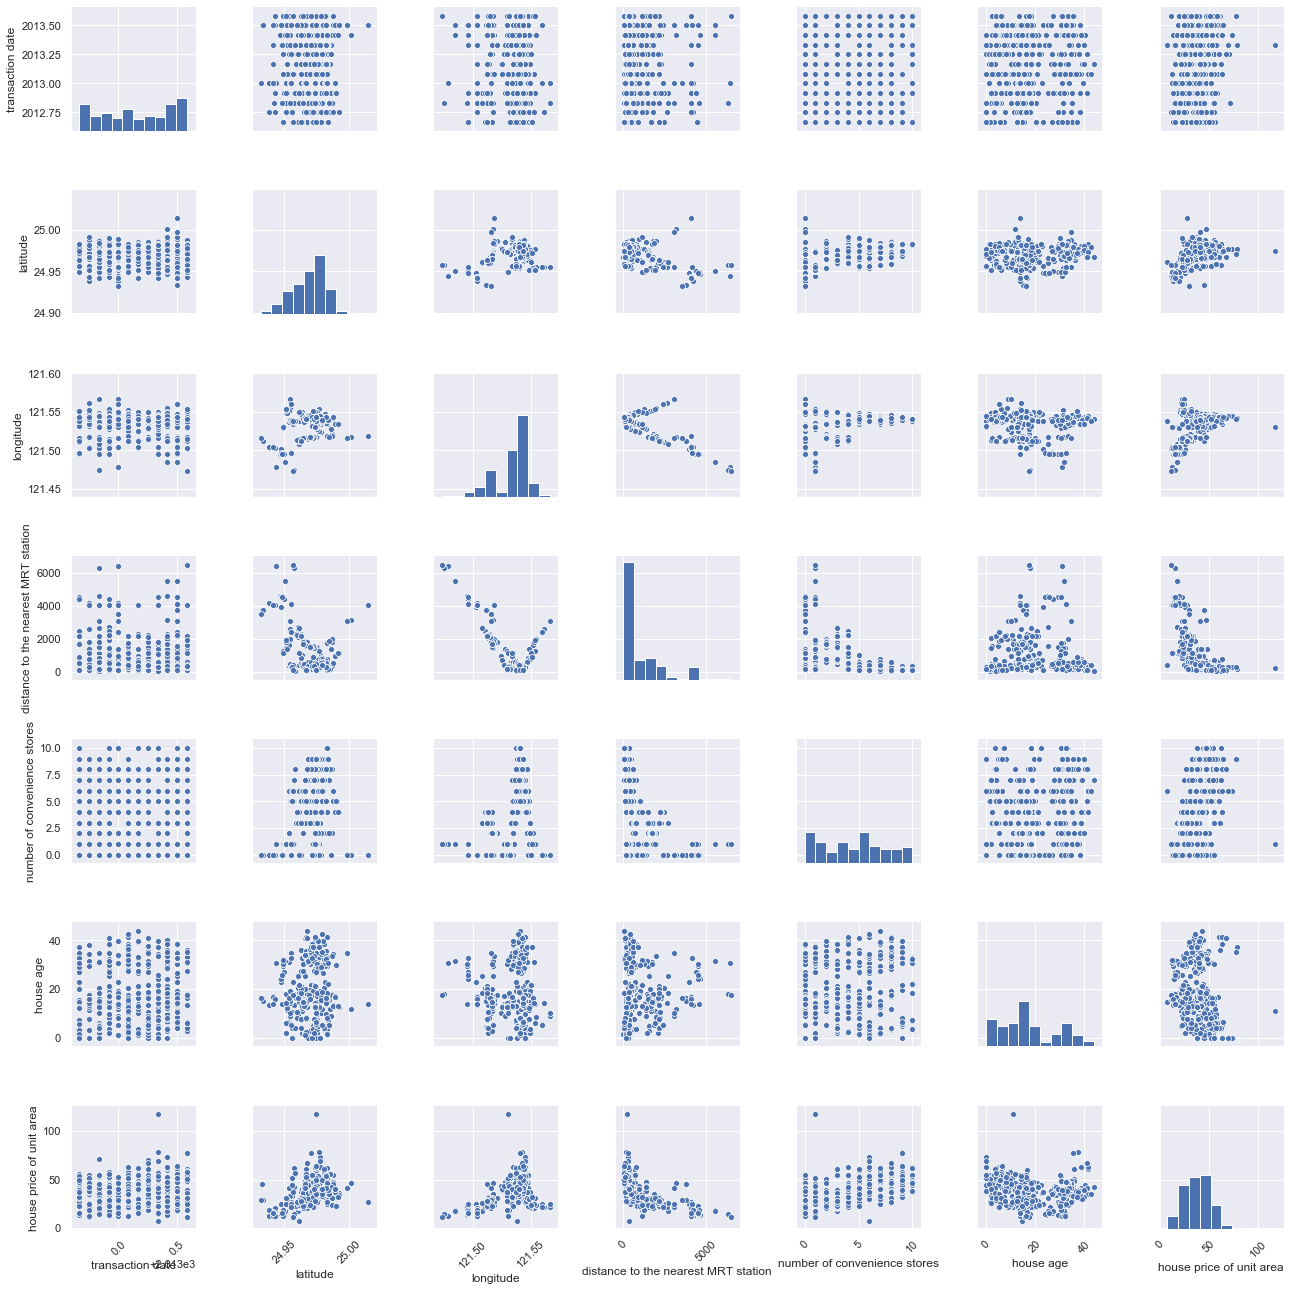

In [215]:
Matrizdedispersion=df[["transaction date", "latitude","longitude","distance to the nearest MRT station","number of convenience stores","house age","house price of unit area"]]
g=sns.pairplot(Matrizdedispersion,diag_kind="hist")
for ax in g.axes.flat:
     plt.setp(ax.get_xticklabels(), rotation=45)
        

## Matriz de correlación

La matriz de correlación nos permite observar si dos variables están relacionadas o no. El resultado del análisis es un coeficiente de correlación que puede tomar valores entre -1 y +1. El signo indica el tipo de correlación entre las dos variables.

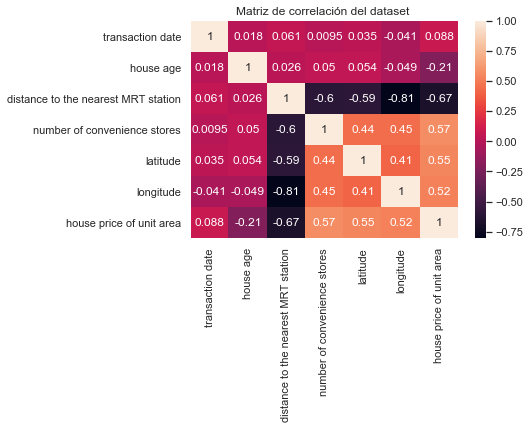

In [216]:
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title("Matriz de correlación del dataset ")
plt.savefig('Matriz de correlación del dataset.png')
plt.show()

# Diagrama de caja del dataset

Con el diagrama de caja podemos representar gráficamente el dataset numérico través de sus cuartiles.

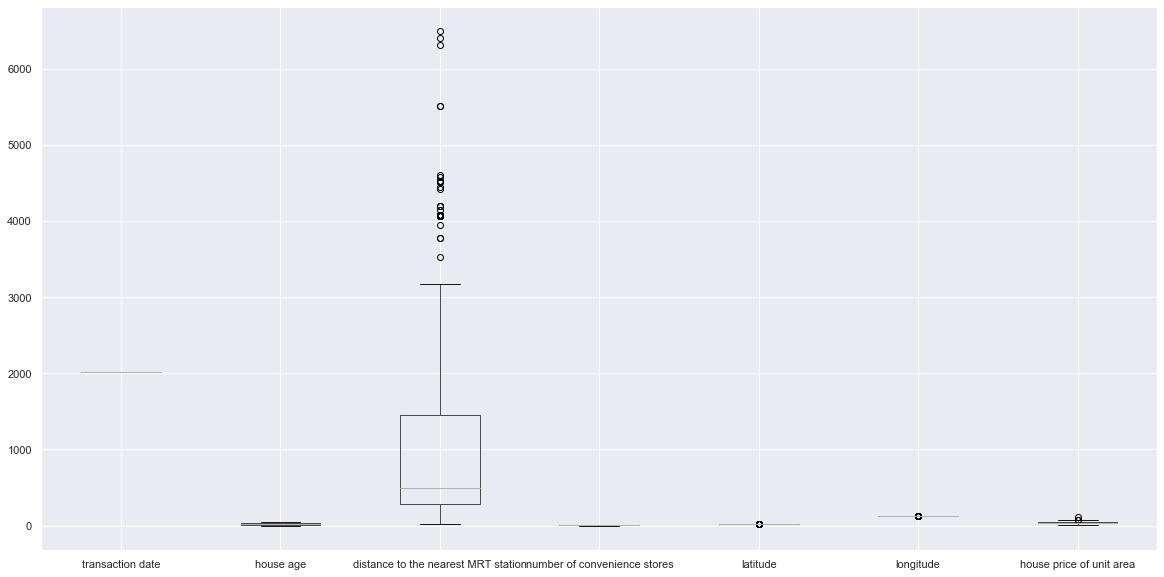

In [217]:
plt.figure(figsize=(20,10))
plt.savefig('Diagrama de caja del dataset.png')
df.boxplot()
plt.show()

Ahora graficaremos los diagramas de caja de cada variable, para visualizar de mejor manera la concentración de los datos.

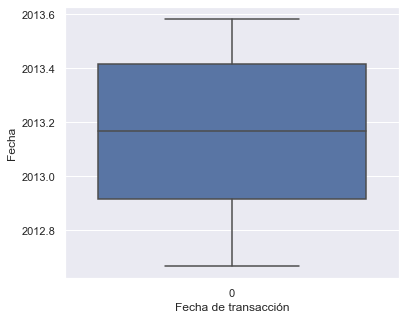

In [218]:
plt.figure(figsize=(6,5))
x = df["transaction date"]
ax=sns.boxplot(data=x)
plt.xlabel("Fecha de transacción")
plt.ylabel("Fecha")
plt.savefig('Diagrama de caja fecha de transacción.png')
plt.show()

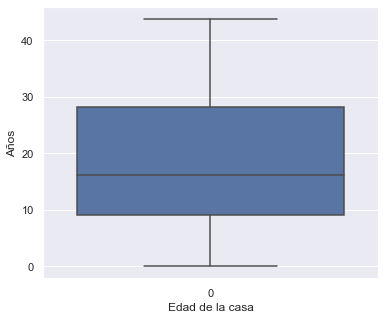

In [219]:
plt.figure(figsize=(6,5))
x = df["house age"]
ax=sns.boxplot(data=x)
plt.xlabel("Edad de la casa")
plt.ylabel("Años")
plt.savefig('Diagrama de caja edad de la casa.png')
plt.show()

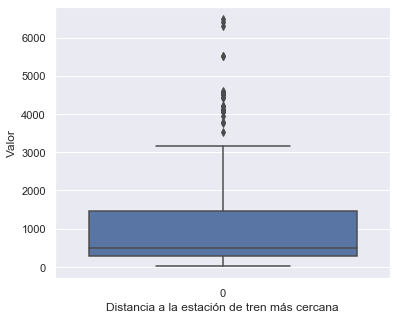

In [237]:
plt.figure(figsize=(6,5))
x = df["distance to the nearest MRT station"]
ax=sns.boxplot(data=x)
plt.xlabel("Distancia a la estación de tren más cercana")
plt.ylabel("Valor")
plt.savefig('Diagrama de caja distancia a la estación de tren más cercana.png')
plt.show()

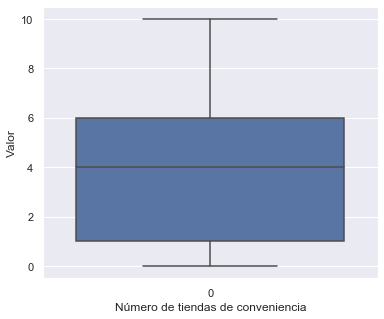

In [221]:
plt.figure(figsize=(6,5))
x = df["number of convenience stores"]
ax=sns.boxplot(data=x)
plt.xlabel("Número de tiendas de conveniencia")
plt.ylabel("Valor")
plt.savefig('Diagrama de caja número de tiendas de conveniencia.png')
plt.show()

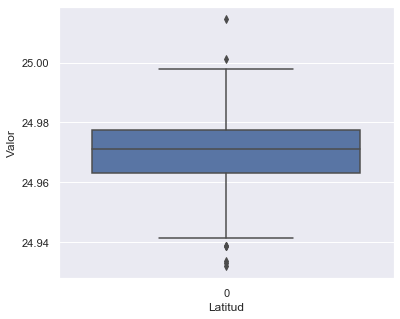

In [222]:
plt.figure(figsize=(6,5))
x = df["latitude"]
ax=sns.boxplot(data=x)
plt.xlabel("Latitud")
plt.ylabel("Valor")
plt.savefig('Diagrama de caja latitud.png')
plt.show()

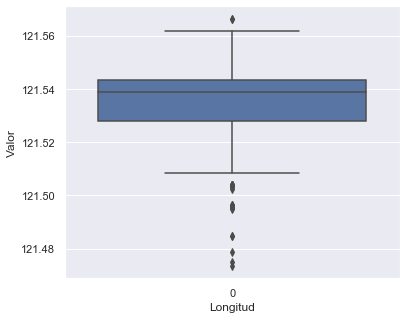

In [223]:
plt.figure(figsize=(6,5))
x = df["longitude"]
ax=sns.boxplot(data=x)
plt.xlabel("Longitud")
plt.ylabel("Valor")
plt.savefig('Diagrama de caja longitud.png')
plt.show()

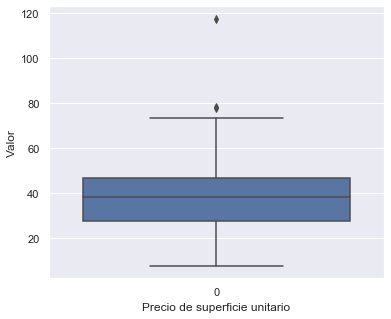

In [224]:
plt.figure(figsize=(6,5))
x = df["house price of unit area"]
ax=sns.boxplot(data=x)
plt.xlabel("Precio de superficie unitario")
plt.ylabel("Valor")
plt.savefig('Diagrama de caja precio de superficie unitario.png')
plt.show()

A continuación se realizará la regresión lineal múltiple con 3, 4 y todas las variables con el fin de observar el comportamiento de R cuadrado y la varianza, posteriormente se analizarán los resultados

## Regresión múltiple con 3 variables independientes

##  a) Regresión lineal y ajuste del modelo:

In [225]:
x1 = df["distance to the nearest MRT station"]  
x2 = df["number of convenience stores"]                            
x3 = df["house age"]
y = df["house price of unit area"]                 
mod = smf.ols('y ~ x1 + x2 + x3 ', data=df).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     161.1
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           5.44e-69
Time:                        22:44:43   Log-Likelihood:                -1506.5
No. Observations:                 414   AIC:                             3021.
Df Residuals:                     410   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9773      1.385     31.041      0.0

## b) Extraer los β estimados:

In [226]:
mod.params

Intercept    42.977286
x1           -0.005379
x2            1.297442
x3           -0.252856
dtype: float64

## c) Extraer el σ2 estimado:

In [227]:
mod.mse_resid

85.58764014385913

Como se observa, los valores P>|t| son muy cercanos a cero, lo cuál nos indica que las variables propuestas si explican el modelo de regresión planteado.

A continuación graficamos los precios reales (observados) contra los calculados a partir del modelo de regresión (predichos)

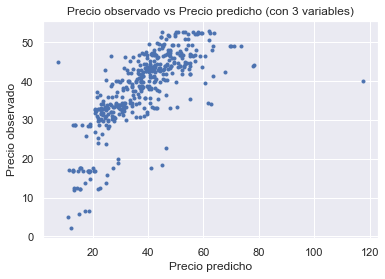

In [228]:
df['predicted'] =  df["distance to the nearest MRT station"]*-0.005379+ df["number of convenience stores"]*1.297442  + df["house age"]*-0.252856 +42.977286
df['observed']  =  df["house price of unit area"]
plt.plot(df['observed'],df['predicted'],marker=".", linestyle="none")
plt.title("Precio observado vs Precio predicho (con 3 variables)")
plt.xlabel("Precio predicho")
plt.ylabel("Precio observado")
plt.savefig('Dispersión Precio observado vs Precio predicho reg con 3 variables .png')
plt.show()

## Regresión múltiple con 4 variables independientes

## a) Regresión lineal y ajuste del modelo:

In [229]:
x1 = df["distance to the nearest MRT station"]  
x2 = df["number of convenience stores"]                            
x3 = df["house age"]
x4 = df["latitude"]
y = df["house price of unit area"]                               # Datos eje Z (Var. Respuesta)
mod = smf.ols('y ~ x1 + x2 + x3 + x4', data=df).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     136.2
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           7.60e-74
Time:                        22:44:45   Log-Likelihood:                -1492.5
No. Observations:                 414   AIC:                             2995.
Df Residuals:                     409   BIC:                             3015.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5916.0065   1112.732     -5.317      0.0

## b) Extraer los β estimados:

In [230]:
mod.params

Intercept   -5916.006496
x1             -0.004175
x2              1.164781
x3             -0.268719
x4            238.635735
dtype: float64

## c) Extraer el σ2 estimado:

In [231]:
mod.mse_resid

80.17504556746252

Como se observa, los valores P>|t| son muy cercanos a cero, lo cuál nos indica que las variables propuestas si explican el modelo de regresión planteado.

A continuación graficamos los precios reales (observados) contra los calculados a partir del modelo de regresión (predichos)

<function matplotlib.pyplot.show(*args, **kw)>

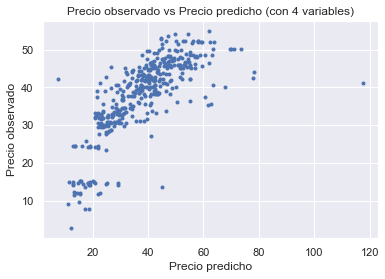

In [232]:
df['predicted'] =  df["distance to the nearest MRT station"]*-0.004175+ df["number of convenience stores"]*1.164781  + df["house age"]*-0.268719 + df["latitude"]*238.635735 - 5916.006496
df['observed']  =  df["house price of unit area"]
plt.plot(df['observed'],df['predicted'],marker=".", linestyle="none")
plt.title("Precio observado vs Precio predicho (con 4 variables)")
plt.xlabel("Precio predicho")
plt.ylabel("Precio observado")
plt.savefig('Dispersión Precio observado vs Precio predicho reg con 4 variables .png')
plt.show


# Tomando todas las variables

In [233]:
x1 = df["distance to the nearest MRT station"]  
x2 = df["number of convenience stores"]                            
x3 = df["latitude"]
x4 = df["longitude"]
x5 = df["transaction date"]
x6 = df["house age"]
y = df["house price of unit area"]                               # Datos eje Z (Var. Respuesta)
mod = smf.ols('y ~ x1 + x2 + x3 + x4 + x5 + x6', data=df).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     94.60
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           4.83e-74
Time:                        22:44:46   Log-Likelihood:                -1487.0
No. Observations:                 414   AIC:                             2988.
Df Residuals:                     407   BIC:                             3016.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.444e+04   6775.386     -2.132      0.0

## b) Extraer los β estimados:

In [234]:
mod.params

Intercept   -14441.982719
x1              -0.004488
x2               1.133325
x3             225.470143
x4             -12.429061
x5               5.149017
x6              -0.269697
dtype: float64

## c) Extraer el σ2 estimado:

In [235]:
mod.mse_resid

78.45556455931073

Como se observa, los valores P>|t| son muy cercanos a cero, excepto el de la variable longitud, por lo cuál se plantea una prueba de hipótesis con el coeficiente de la longitud, dado que el valor de P es bastante grande se puede no rechazar la prueba de hipótesis, es decir, podremos quitar la variable longitud sin que afecte mucho nuestro modelo, e incluso lo podría mejorar. 

Es interesante observar que, no en todos los casos el hecho de añadir más variables independientes a nuestro modelo de regresión lineal, nos dará un modelo más óptimo, esto se debe a que cada variable añadida crea interrelaciones con las demás variables, cambiando el valor del coeficiente de determinación (R cuadrado) y el error. 

En nuestro caso, se observa que el valor de R cuadrado es mayor a medida que se agregan más variables independientes, pero vale aclarar que esto se dio debido a nuestro criterio de escogencia, enfatizamos de nuevo que no siempre añadir más variables nos dará un mejor modelo matemático.

A continuación graficamos los precios reales (observados) contra los calculados a partir del modelo de regresión (predichos)

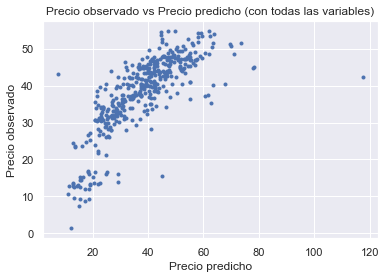

In [236]:
df['predicted'] =  df["distance to the nearest MRT station"]*-0.004488+ df["number of convenience stores"]*1.133325  + df["latitude"]*225.470143 + df["longitude"]*-12.429061 + df["transaction date"]*5.149017 + df["house age"]*-0.269697- 14441.982719
df['observed']  =  df["house price of unit area"]
plt.plot(df['observed'],df['predicted'],marker=".", linestyle="none")
plt.title("Precio observado vs Precio predicho (con todas las variables)")
plt.xlabel("Precio predicho")
plt.ylabel("Precio observado")
plt.savefig('Dispersión Precio observado vs Precio predicho reg con todas las variables .png')
plt.show()
